In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
# Top 10 Directors by Number of Movies Count the movies directed by each director and identify the top 10.
top_directors = df["Director"].value_counts()
top=top_directors.head(10)
print(top)

Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Stanley Kubrick       9
Billy Wilder          9
Woody Allen           9
Christopher Nolan     8
Quentin Tarantino     8
Name: count, dtype: int64


In [4]:
# Average Rating by Genre Calculate the average rating for each genre.
df['Genre'] = df['Genre'].str.split(',') 
df = df.explode('Genre')
average_ratings = df.groupby('Genre')['IMDB_Rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='IMDB_Rating', ascending=False)
average_ratings

,Genre,IMDB_Rating
33,Western,8.350000
25,Crime,8.016822
18,War,8.013725
28,Fantasy,8.000000
8,Film-Noir,7.993750
15,Sci-Fi,7.977612
31,Mystery,7.975000
13,Mystery,7.966667
29,Film-Noir,7.966667
5,Drama,7.960690


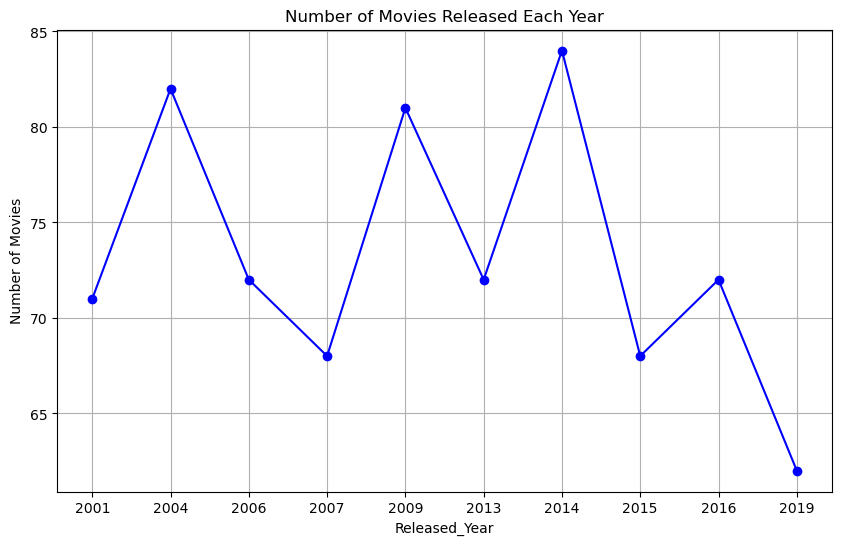

In [5]:
# Release Year Trend Visualize the number of movies released each year to spot trends for 10 years.
df['Released_YearReleased_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce') 
movies_per_year = df['Released_Year'].value_counts().nlargest(10).sort_index()
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-', color='b')
plt.title("Number of Movies Released Each Year")
plt.xlabel("Released_Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

In [6]:
# Longest Movies by Genre Identify the longest movie in each genre based on runtime
if 'Runtime' in df.columns:
    df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=False)  
    df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')  
if 'Genre' in df.columns:
    df['Genre'] = df['Genre'].str.split(',')  
    df = df.explode('Genre')  
if 'Runtime' in df.columns and 'Genre' in df.columns:
    longest_movies = df.loc[df.groupby('Genre')['Runtime'].idxmax()]
    longest_movies = longest_movies[['Genre', 'Series_Title', 'Runtime']].sort_values(by='Genre')
    print(longest_movies)
else:
    print("Required columns 'Genre' or 'Runtime' are missing.")

          Genre                  Series_Title  Runtime
70       Action                 Mononoke-hime      134
70    Adventure                 Mononoke-hime      134
31    Adventure          Shichinin no samurai      207
332   Adventure      Kaguyahime no monogatari      137
116   Biography            Lawrence of Arabia      228
..          ...                           ...      ...
712   Film-Noir             Shadow of a Doubt      108
419      Horror                  The Exorcist      122
145     Mystery                Shutter Island      138
700    Thriller               Wait Until Dark      108
48      Western  Once Upon a Time in the West      165

[85 rows x 3 columns]


In [7]:
# Movies per Language Count movies by language.
if 'Language' in df.columns:
    movies_per_language = df['Language'].value_counts().reset_index()
    movies_per_language.columns = ['Language', 'Count'] 
    movies_per_language = movies_per_language.sort_values(by='Count', ascending=False)
    print(movies_per_language)
else:
    print("The dataset does not have a 'Language' column.") 

The dataset does not have a 'Language' column.


In [8]:
df.count()

Poster_Link                   2541
Series_Title                  2541
Released_Year                 2541
Certificate                   2306
Runtime                       2541
Genre                         2541
IMDB_Rating                   2541
Overview                      2541
Meta_score                    2146
Director                      2541
Star1                         2541
Star2                         2541
Star3                         2541
Star4                         2541
No_of_Votes                   2541
Gross                         2109
Released_YearReleased_Year    2538
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2541 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Poster_Link                 2541 non-null   object 
 1   Series_Title                2541 non-null   object 
 2   Released_Year               2541 non-null   object 
 3   Certificate                 2306 non-null   object 
 4   Runtime                     2541 non-null   int64  
 5   Genre                       2541 non-null   object 
 6   IMDB_Rating                 2541 non-null   float64
 7   Overview                    2541 non-null   object 
 8   Meta_score                  2146 non-null   float64
 9   Director                    2541 non-null   object 
 10  Star1                       2541 non-null   object 
 11  Star2                       2541 non-null   object 
 12  Star3                       2541 non-null   object 
 13  Star4                       2541 non-nu